# Finding movie similarities

## 1. Import and observe dataset
Movies have a unique way of captivating our imaginations, transcending genres and personal preferences. Whether you're a fan of sci-fi epics, heartwarming dramas, or intense thrillers, there are often subtle patterns that connect seemingly disparate films.

Movies within a genre often share common characteristics. Let's consider two examples: Take, for instance, "Dune" and "The Matrix"

<div style="text-align: center;">
  <img style="margin: 2px 10px 2px 1px; height: 450px; display: inline-block;" alt="The Batman" src="https://i.ebayimg.com/images/g/ViAAAOSwn-Nlzmtp/s-l1200.webp">
  <img style="margin: 2px 10px 2px 1px; height: 450px; display: inline-block;" alt="Iron Man" src="https://funkygraphix.co.uk/cdn/shop/products/TheMatrix_1999_v1_85add08a-0421-4f80-8219-a7d8f577bd9e_530x@2x.jpg?v=1629623735">
</div>

At first glance, these films may seem quite different—one is a sci-fi epic set on a desert planet, while the other is a cyberpunk thriller set in a dystopian future. However, both films explore themes of destiny, rebellion against oppressive systems and feature protagonists who undergo transformative journeys in their quests to overcome existential threats.

Through this analysis, we will delve into the similarities between movies by examining their plot summaries from IMDb and Wikipedia. By quantifying these similarities and clustering the films, we can gain a deeper understanding of their relationships. A dendrogram will be created to visually depict how closely related these movies are, regardless of their differing genres.


First of all let's install libraries that we will need to make project work in Binder..

In [18]:
%pip install numpy
%pip install pandas
%pip install nltk
%pip install matplotlib
%pip install scikit-learn
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [49]:
# Importing modules
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')


# Seting seed for reproducibility
np.random.seed(5)

# Reading in IMDb and Wikipedia movie data (both in same file)
movies_df = pd.read_csv('datasets/movies.csv')
print("Number of movies loaded: %s " % (len(movies_df)))


# Displaing the data
movies_df

Number of movies loaded: 100 


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\terec\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\terec\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,rank,title,genre,wiki_plot,imdb_plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."
...,...,...,...,...,...
95,95,Rebel Without a Cause,[u' Drama'],\n\n\n\nJim Stark is in police custody.\n\n \...,Shortly after moving to Los Angeles with his p...
96,96,Rear Window,"[u' Mystery', u' Thriller']",\n\n\n\nJames Stewart as L.B. Jefferies\n\n \...,"L.B. ""Jeff"" Jeffries (James Stewart) recuperat..."
97,97,The Third Man,"[u' Film-Noir', u' Mystery', u' Thriller']",\n\n\n\nSocial network mapping all major chara...,"Sights of Vienna, Austria, flash across the sc..."
98,98,North by Northwest,"[u' Mystery', u' Thriller']",Advertising executive Roger O. Thornhill is mi...,"At the end of an ordinary work day, advertisin..."


## 2. Combining Wikipedia and IMDb plot summaries
The dataset we have imported includes two columns: <code>wiki_plot</code> and <code>imdb_plot</code>, containing plot summaries from Wikipedia and IMDb, respectively. While the content in these columns is similar, the tone and linguistic expression differ, providing varied contextual insights into each movie. Additionally, the text in one column might include plot details not present in the other. 

For example, with The Godfather, the Wikipedia summary states: "On the day of his only daughter's wedding, Vito Corleone," whereas the IMDb summary provides more detail: "In late summer 1945, guests are gathered for the wedding reception of Don Vito Corleone's daughter Connie." 

To streamline the analysis and reduce computational overhead, we will merge these two columns into a single one, incorporating the comprehensive details from both sources.

In [50]:
# Combining wiki_plot and imdb_plot into a single column
movies_df['plot'] = movies_df['wiki_plot'].astype(str) + "\n" + movies_df['imdb_plot'].astype(str)

# Inspect the new DataFrame
movies_df.head()

,rank,title,genre,wiki_plot,imdb_plot,plot
0,0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit..."
1,1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ..."
2,2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the..."
3,3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight..."
4,4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...


## 3. Tokenization
Tokenization involves breaking down text into individual sentences or words to facilitate analysis. In addition to using the tokenization methods provided by NLTK, we might need to apply further filtering to exclude tokens that are purely numeric or consist of punctuation marks.

For example, a phrase like "While waiting at a bus stop in 1981" (from Forrest Gump) might not provide context if analyzed as a whole since it contains a year that may not match any dictionary entries. However, the individual words "while," "waiting," and "bus" can offer meaningful context because they are recognizable in the English language.

To demonstrate, let’s perform tokenization on a brief excerpt from The Godfather. This process will break down the text into individual words, allowing us to analyze and filter out any tokens that are not relevant to our analysis.

In [51]:

# Tokenize a paragraph into sentences and store in sent_tokenized
sent_tokenized = [sent for sent in nltk.sent_tokenize("""
                        Today (May 19, 2016) is his only daughter's wedding. 
                        Vito Corleone is the Godfather.
                        """)]

# Word Tokenize first sentence from sent_tokenized, save as words_tokenized
words_tokenized = [word for word in nltk.word_tokenize(sent_tokenized[0])]

# Remove tokens that do not contain any letters from words_tokenized
import re

filtered = [word for word in words_tokenized if re.search('[a-zA-Z]', word)]

# Display filtered words to observe words after tokenization
filtered

['Today', 'May', 'is', 'his', 'only', 'daughter', "'s", 'wedding']

## 4. Stemming
Stemming is a technique used to reduce words to their root form, allowing us to treat different forms of the same word as equivalent. This simplifies text analysis by consolidating variations of a word into a single entry. For example, "fishing," "fished," and "fisher" are all stemmed to "fish."

Consider these sentences:

"Young William Wallace witnesses the treachery of Longshanks" ~ Gladiator

"Escapes to the city walls only to witness Cicero's death" ~ Braveheart

Instead of creating separate dictionary entries for "witnesses" and "witness," which have the same meaning in this context, stemming reduces both to "wit."

To achieve this, we will use the Snowball Stemmer, which is one of several algorithms available for stemming, such as the Porter Stemmer. The Snowball Stemmer will help us standardize different word forms into their root equivalents efficiently.

In [54]:
from nltk.stem.snowball import SnowballStemmer

# Paragraph to be tokenized
paragraph = """
Today (May 19, 2016) is his only daughter's wedding. 
Vito Corleone is the Godfather.
"""

# Tokenizing a paragraph into sentences and store in sent_tokenized
sent_tokenized = [sent for sent in nltk.sent_tokenize(paragraph)]

# Word Tokenize first sentence from sent_tokenized, save as words_tokenized
words_tokenized = [word for word in nltk.word_tokenize(sent_tokenized[0])]

# Removing tokens that do not contain any letters from words_tokenized
filtered = [word for word in words_tokenized if re.search('[a-zA-Z]', word)]

# Printing filtered to observe words without stemming
print("Without stemming: ", filtered)

# Creating an English language SnowballStemmer object
stemmer = SnowballStemmer("english")

# Steming the words from filtered and store in stemmed_words
stemmed_words = [stemmer.stem(word) for word in filtered]

# Printing the stemmed_words to observe words after stemming
print("After stemming:   ", stemmed_words)


Without stemming:  ['Today', 'May', 'is', 'his', 'only', 'daughter', "'s", 'wedding']
After stemming:    ['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wed']


## 5. Integrating Tokenization and Stemming for Enhanced Text Analysis
We can tokenize and stem sentences effectively by creating a function that performs both operations in sequence. This function can then be used as the tokenizer argument when generating the TF-IDF vector for text analysis.

Here's how it impacts our results: Consider the sentence from The Godfather: "Today (May 19, 2016) is his only daughter's wedding." 

If we perform 'tokenize-only,' the output is:

'today', 'may', 'is', 'his', 'only', 'daughter', "'s", 'wedding'

However, if we use 'tokenize-and-stem,' the result is:

'today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wed'

Stemming reduces words to their root forms, providing a more consistent representation of meaning. This approach helps establish connections between different word forms that may not all be present in the NLTK training corpus.

In [58]:

# Defining a function to perform both stemming and tokenization
def tokenize_and_stem(text):
    # Creating  an English language SnowballStemmer object
    stemmer = SnowballStemmer("english")
    
    # Tokenizing  by sentence, then by word
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    
    # Filtering  out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    
    # Stemming  the filtered_tokens
    stems = [stemmer.stem(token) for token in filtered_tokens ]
    
   
    
    return stems

# Example usage
words_stemmed = tokenize_and_stem("Today (May 19, 2016) is his only daughter's wedding.")
print(words_stemmed)

TypeError: 'bool' object is not iterable

## 6. From Text to Numbers: Using TF-IDF
Computers cannot directly understand text; they process numerical data. Thus, we must convert textual plot summaries into numerical formats for meaningful analysis. A straightforward method is to count word occurrences using <code>CountVectorizer</code>, but this can be misleading since common words like "the" appear frequently but are not indicative of the movie's theme. 

Term Frequency-Inverse Document Frequency (TF-IDF) addresses this issue by measuring how often a word appears in a document (Term Frequency) and adjusting its importance based on how common it is across multiple documents (Inverse Document Frequency). For example, applying TF-IDF to sentences from The Wizard of Oz highlights 'Toto' as a key term, reflecting its significant role in the plot.

In essence, TF-IDF helps identify words that are unique and significant to a specific document, enhancing our analysis of movie plots.

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the TfidfVectorizer with the specified parameters
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.8,           # Ignore terms that appear in more than 80% of the documents
    max_features=200000,  # Limit the number of features (terms) to 200,000
    min_df=0.2,           # Ignore terms that appear in fewer than 20% of the documents
    stop_words='english', # Use English stop words
    use_idf=True,         # Use inverse document frequency
    tokenizer=tokenize_and_stem, # Use the custom tokenizer and stemmer function
    ngram_range=(1, 3),    # Use unigrams, bigrams, and trigrams
    token_pattern=None
)

## 7. Fit transform TfidfVectorizer
To convert text into a numerical format that computers can understand, we use the <code>TfidfVectorizer</code>. We fit the text to the vectorizer and then apply the <code>fit_transform()</code> method to produce the corresponding numeric data.

The stopwords parameter in the <code>TfidfVectorizer</code> helps filter out common words that don't add significant meaning to the text. For example, in the sentence "Dorothy Gale lives with her dog Toto on the farm of her Aunt Em and Uncle Henry," words like 'her' and 'the' are considered stopwords and can be removed without altering the sentence's overall meaning.

By setting stopwords to 'english', we instruct the vectorizer to exclude all stopwords from a predefined list available in the NLTK module. The <code>ngram_range</code> parameter defines the length of the n-grams (combinations of words) to be used during vectorization, allowing for flexible text representation.

In [57]:
# Fit and transform the tfidf_vectorizer with the "plot" of each movie
# to create a vector representation of the plot summaries
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df["plot"])

# Print the shape of the resulting tfidf_matrix
print(tfidf_matrix.shape)

d:\Python\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


(100, 564)


## 8. Import KMeans and create clusters
To analyze how closely related movies are to each other, we can use clustering techniques. Clustering groups items with similar properties, creating one or more clusters based on the desired similarity measure.

For our dataset, clustering could be based on movie genres. For instance, we might have:

Cluster '0' for movies in the 'Drama' genre, such as Chinatown or Psycho.
Cluster '1' for movies in the 'Adventure' genre, including Lawrence of Arabia and Raiders of the Lost Ark.
The K-means algorithm is a popular method for clustering in Python. It works by dividing the sample into K clusters, with each cluster represented by the mean of all items within it. The distribution of clusters will then be analyzed based on this methodology.


In [26]:
# Import k-means to perform clusters
from sklearn.cluster import KMeans

# Create a KMeans object with 5 clusters and save as km
km = KMeans(n_clusters=5, random_state=42)  # random_state ensures reproducibility

# Fit the k-means object with tfidf_matrix
km.fit(tfidf_matrix)

# Obtain the cluster labels
clusters = km.labels_.tolist()

# Create a column 'cluster' to denote the generated cluster for each movie
movies_df["cluster"] = clusters

# Display number of films per cluster (clusters from 0 to 4)
print(movies_df['cluster'].value_counts())



cluster
3    31
4    30
2    18
1    15
0     6
Name: count, dtype: int64


For a better understanding, let's create a bar plot.

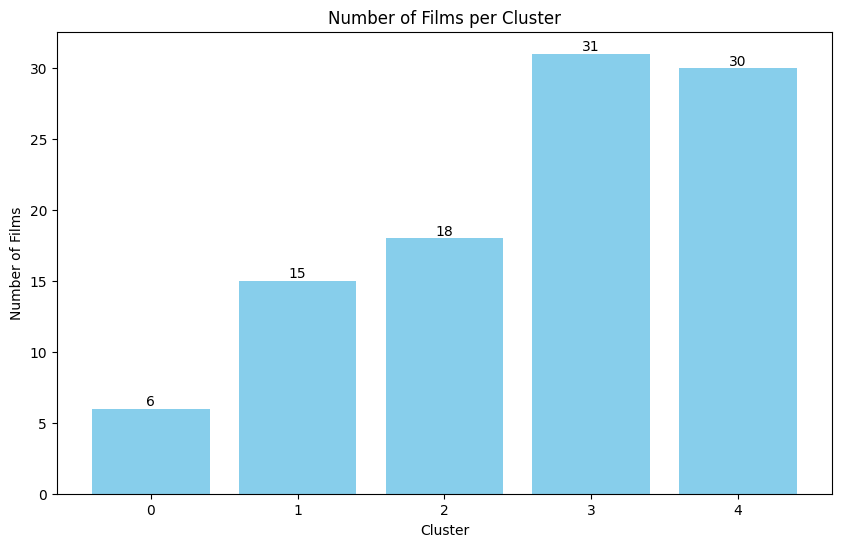

In [27]:
import matplotlib.pyplot as plt

# Counting the number of films per cluster
cluster_counts = movies_df['cluster'].value_counts().sort_index()

# Createing the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')

# Adding labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Films')
plt.title('Number of Films per Cluster')


# Adding numbers on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, 
             f'{int(height)}', ha='center', va='bottom')

# Showing the plot
plt.show()

## 9. Calculating Similarity Distance 
Consider these two sentences from The Wizard of Oz:
<blockquote>
  <p>"they find in the Emerald City"</p>
  <p>"they finally reach the Emerald City"</p>
</blockquote>
Using a CountVectorizer, the vocabulary generated would be: "they, find, in, the, Emerald, City, finally, reach." The vectors for these sentences would be:
<blockquote>
  <p>1, 1, 1, 1, 1, 1, 0, 0</p>
  <p>1, 0, 0, 1, 1, 1, 1, 1</p>
</blockquote>
The <a href="https://en.wikipedia.org/wiki/Cosine_similarity">cosine similarity angle</a> between these vectors is calculated to be 0.667, indicating that the sentences are closely related. Cosine similarity measures the cosine of the angle between two vectors, where a score of 1 represents identical vectors. The similarity distance, which represents how different the vectors are, is calculated as 1 minus the cosine similarity score. Therefore, if vectors are very similar, the cosine similarity approaches 1, resulting in a distance of 1 - 1 = 0.

We will apply this method to calculate the similarity distance for all movies in our dataset.

In [28]:
# Importing cosine_similarity to calculate similarity of movie plots
from sklearn.metrics.pairwise import cosine_similarity

# Calculating the similarity distance
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

## 10. Getting ready to create a Dendrogram
To visually understand the similarity between movies, we will create a tree-like diagram called a dendrogram. This tool helps visualize the results of hierarchical clustering, an alternative to k-means clustering. In a dendrogram, movies grouped at the same level of the hierarchy indicate similar levels of similarity.

For example, if Fargo and North by Northwest are clustered together at the same level as Platoon and Saving Private Ryan, it means these pairs of movies exhibit similar degrees of similarity according to the hierarchical clustering results.

In [29]:
# Configure matplotlib to display the output inline
%matplotlib inline

# Import modules necessary to plot dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

## 11. Create merging and plot dendrogram
We will create a dendrogram to visualize the similarity between movies, based on the similarity distances we calculated earlier. A dendrogram is a tree-like diagram that illustrates the hierarchical clustering of data points. In this case, it will help us understand how closely related different movies are based on their plot similarities.

The linkage in the dendrogram reflects the similarity distance between movies. A shorter linkage on the y-axis suggests that the movies are very similar to each other. For example, if the dendrogram shows a low linkage between It's a Wonderful Life and A Place in the Sun, it means these movies have highly similar plots.

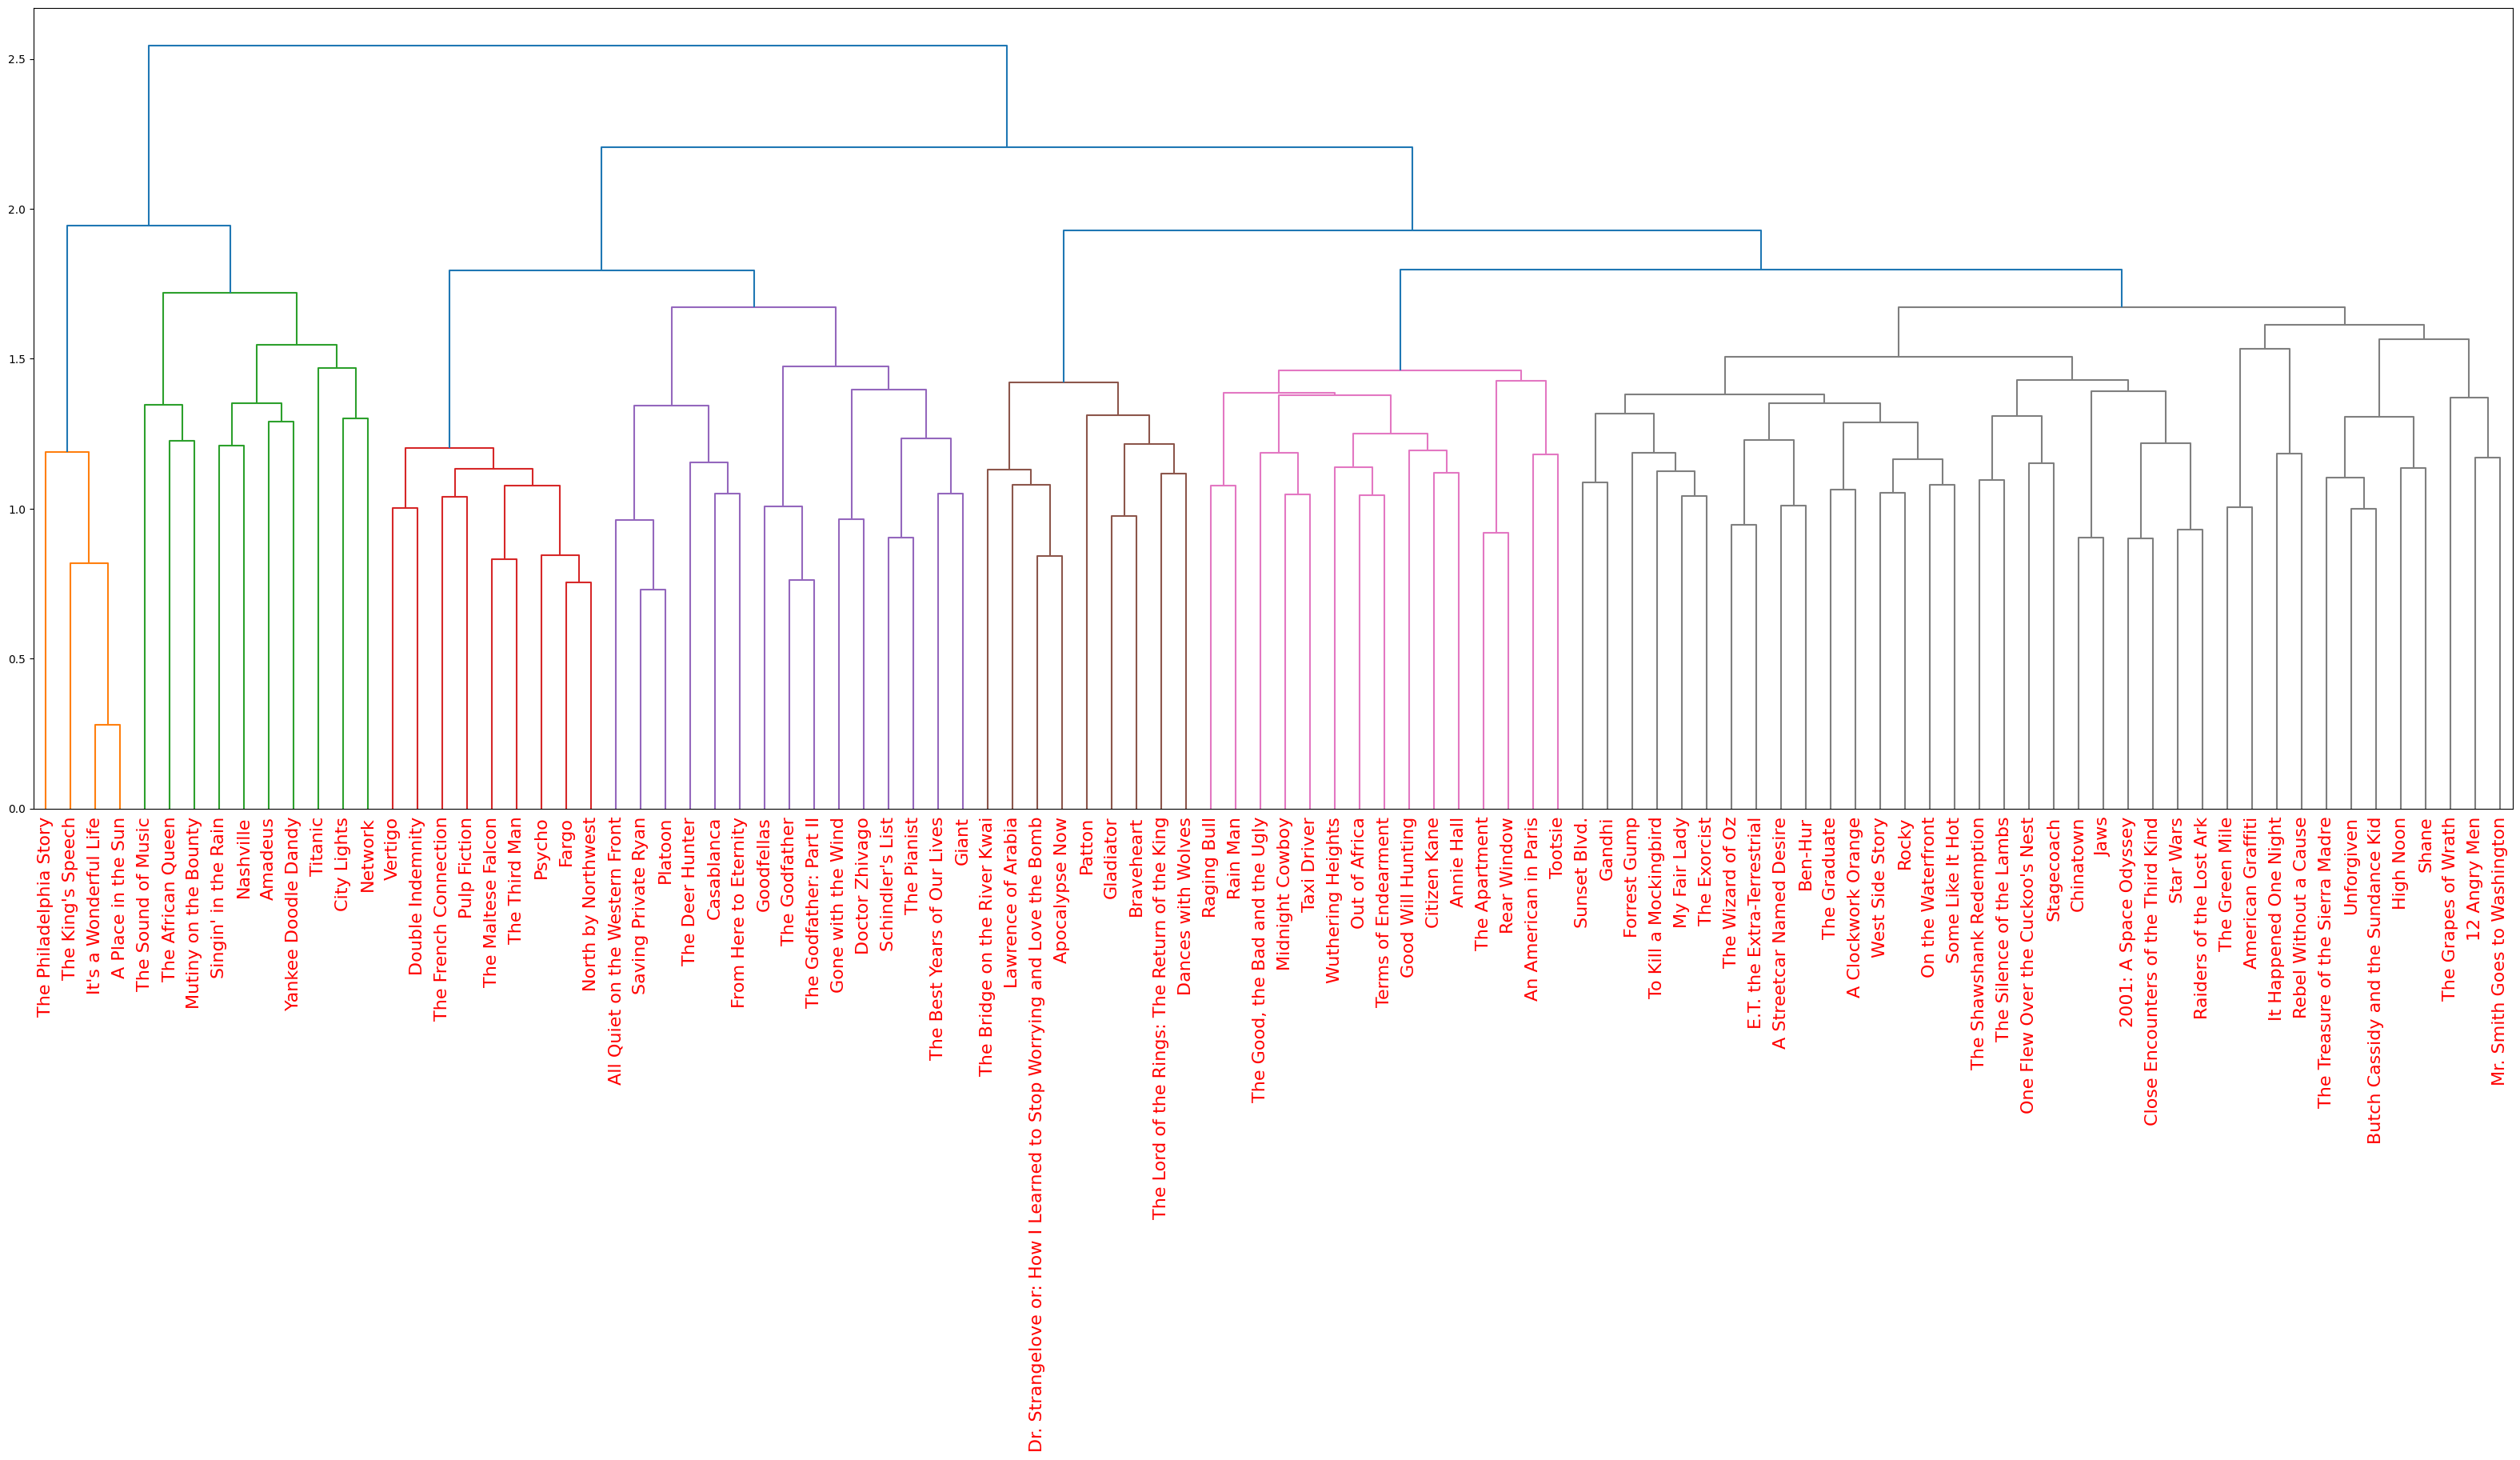

In [30]:
# Create mergings matrix 
mergings = linkage(similarity_distance, method='complete')

# Plot the dendrogram
dendrogram_ = dendrogram(
    mergings,
    labels=[x for x in movies_df["title"]],
    leaf_rotation=90,
    leaf_font_size=16,
)

# Adjust the plot
fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(40, 13)

# Show the plotted dendrogram
plt.show()

## 12. Finding similar movies

For the average person, visualizing data through a dendrogram might be confusing and overwhelming. A dendrogram is a tree-like diagram that shows the arrangement of clusters based on similarity, but interpreting these diagrams can be complex, especially for those unfamiliar with hierarchical clustering. To simplify the process of discovering movies with similar plots, we can use a more user-friendly approach.

Instead of delving into intricate dendrograms, let's focus on creating a practical function that allows us to find and display similar movies based on their plot summaries. This function will make it easy to see which movies are closely related to a selected film, helping you quickly discover films that match your interests.

In [31]:
# Function to find similar movies
def find_similar_movies(selected_movie_title, top_n=5):
    # Ensuring the selected movie is in the dataframe
    if selected_movie_title not in movies_df['title'].values:
        print("Movie not found in the dataset.")
        return
    
    # Geting  the index of the selected movie
    idx = movies_df[movies_df['title'] == selected_movie_title].index[0]
    
    # Computing  the similarity distances
    similarity_matrix = cosine_similarity(tfidf_matrix)
    
    # Geting  the similarity scores for the selected movie
    similarity_scores = list(enumerate(similarity_matrix[idx]))
    
    # Sorting  movies based on similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Geting  the indices of the top_n most similar movies
    movie_indices = [i[0] for i in similarity_scores[1:top_n+1]]
    
    # Geting  the titles of the most similar movies
    similar_movies = movies_df['title'].iloc[movie_indices].values
    
    print(f"Movies similar to {selected_movie_title}:")
    for i, movie in enumerate(similar_movies, start=1):
        print(f"{i}. {movie}")

# Example of usage
selected_movie = "Braveheart" 
find_similar_movies(selected_movie, top_n=5)

Movies similar to Braveheart:
1. Gladiator
2. Gone with the Wind
3. The Godfather
4. The Lord of the Rings: The Return of the King
5. Dances with Wolves


## 13. Creating a widget 

To make the process of finding similar movies even more user-friendly, we can create an interactive widget. This widget will allow users to effortlessly select a movie and specify the number of similar films they wish to discover. By integrating this functionality into a widget, we can streamline the movie discovery experience, making it intuitive and accessible.

In [32]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Sort movie titles alphabetically
sorted_titles = sorted(movies_df['title'].tolist())

# Create a dropdown menu for selecting a movie
movie_dropdown = widgets.Dropdown(
    options=sorted(movies_df['title'].unique()),  # Sorted list of movie titles
    description='Select Movie:',
    style={'description_width': 'initial'}  # Adjust width of description
)

# Create a slider for selecting the number of similar movies
num_movies_slider = widgets.IntSlider(
    value=5,  # Default number of similar movies to show
    min=1,    # Minimum number of movies
    max=20,   # Maximum number of movies
    step=1,   # Step size
    description='Number of Similar Movies:',
    style={'description_width': 'initial'}  # Adjust width of description
)

# Output widget to display the results
output = widgets.Output()

def on_selection_change(change):
    with output:
        output.clear_output()
        movie_title = movie_dropdown.value
        num_movies = num_movies_slider.value
        
        # Validate the number of similar movies
        if not (1 <= num_movies <= 20):
            print("Please select a number between 1 and 20.")
            return
        
        # Call the function to find similar movies and display results
        find_similar_movies(movie_title, top_n=num_movies)

# Attach the function to both the dropdown and the slider
movie_dropdown.observe(on_selection_change, names='value')
num_movies_slider.observe(on_selection_change, names='value')

# Display the widgets in the correct order
display(movie_dropdown, num_movies_slider, output)

# Trigger the function once initially to display results
on_selection_change(None)

Dropdown(description='Select Movie:', options=('12 Angry Men', '2001: A Space Odyssey', 'A Clockwork Orange', …

IntSlider(value=5, description='Number of Similar Movies:', max=20, min=1, style=SliderStyle(description_width…

Output()

# Conclusion

In this project, we leveraged advanced text analysis techniques to develop a tool that identifies movies with similar plot summaries. We started by applying tokenization and stemming to preprocess the text, breaking down movie plots into key components and reducing words to their base forms. This preprocessing step was crucial for enhancing the accuracy of our analysis.

We then utilized TF-IDF and the TfidfVectorizer to convert the text into numerical data, capturing the importance of each term relative to the entire dataset. Following this, we employed K-means clustering to group movies based on plot similarities and calculated similarity distances to measure how closely related different movies were.

To make the analysis user-friendly, we created an interactive widget in Jupyter Notebook. Users can select a movie from a dropdown menu and specify the number of similar movies they want to find using a slider. The widget then dynamically displays the titles of the most similar movies, allowing users to easily explore films with similar themes or storylines.